# Modelling cluster magnetic fields as Gaussian random fields

In [1]:
import sys
from grampa import magneticfieldmodel
from grampa import magneticfieldmodel_utils as mutils

First we have to define an electron density radial profile. Let's use a typical beta-model, which is implemented in mutils. We'll set the parameters to be those of the galaxy cluster Abell 2256, reported in Osinga+2024

It needs to be a function that takes a radius in kpc, and returns ionized electron density in cm^-3. 

In [2]:
# The electron density model (can replace by own model, currently wraps around beta model)
def ne_funct(r):
    """Takes radius in kpc and returns n_e in cm^-3    
    use Osinga+24 parameters for Abell 2256, from Remi Adam
    """
    return mutils.beta_model(r, ne0=0.0031, r_c=341, beta=0.77)

Then we'll need to define the parameters for the magnetic field as a dictionary

In [3]:
args = {
'sourcename': 'example_A2256', # sourcename for saving filenames
 'reffreq': 944.0, # reference frequency in MHz
 'cz': 0.058, # cluster redshift 
 'iteration': 0, # simple counter for saving filenames
 'xi': 5.67, # vector potential power spectrum index
 'eta': 0.5, # B propto ne^eta, 0.5 = constant ratio of magnetic to thermal energy for an isothermal cluster
 'B0': 1.0, # central magnetic field strength
 'lambdamax': None, # maximum B-field fluctuation scale in kpc
 'pixsize': 10.0, # 1 pixel = this many kpc
 'N': 256, # amount of pixels, will generate N^3 cube
 'fluctuate_ne': True, # whether to simulate smooth (False) or fluctuating (True) electron density 
 'mu_ne_fluct': 1.0, # mean of the fluctuating ne cube (arbitrary number because its normalised to the ne profile after)
 'sigma_ne_fluct': 0.2, # fluctuation magnitude in ne profile
 'lambdamax_ne_fluct': 100, # maximum n_e fluctuation scale in kpc
 'dtype': 32, # float32 will be used to save memory
 'garbagecollect': True, # enforce garbagecollect during the code to save memory
 'recompute': True, # force recompute, even if previous run was saved to file
 'subcube_ne': True, # use spherical symmetry to speed up calculations involving ne cube
 'savedir': '../tests_local/', # where to save the results
 'saverawfields': True, # Whether to save the unnormalised A vector potential and B field.
 'saveresults': True, # Whether to save the normalised B field, RM images, etc (i.e. the results)
 'beamsize': 20.0, # beamsize in arcseconds for smoothing RM images
 'frame': 'observedframe', # whether to calculate RM images in observed frame or cluster rest-frame. (1+z)^2 factor difference
 'testing': True # whether to make plots for verification
 }


Now, we initialise the model with the electron density function and the arguments defined above

In [4]:
# Initialise the model with arguments and density function
model = magneticfieldmodel.MagneticFieldModel(args, ne_funct=ne_funct)

2025-03-12 12:22:18,942 INFO magneticfieldmodel __init__ Creating magnetic field model with GRAMPA...
2025-03-12 12:22:18,944 WARNING magneticfieldmodel check_resolution_beamsize User input angular resolution of 20.0 arcsec corresponds to physical resolution of 22.46 kpc (FWHM).
2025-03-12 12:22:18,945 WARNING magneticfieldmodel check_resolution_beamsize WARNING: However, models are being ran with p=10.0 kpc. The code will smooth to 50.0 kpc automatically. This corresponds to a beam size of 44.51 arcsec instead. Please keep this in mind.
2025-03-12 12:22:18,947 INFO magneticfieldmodel log_parameters Using parameters:
2025-03-12 12:22:18,948 INFO magneticfieldmodel log_parameters  xi=5.67 (n=3.67)
2025-03-12 12:22:18,949 INFO magneticfieldmodel log_parameters  N=256
2025-03-12 12:22:18,951 INFO magneticfieldmodel log_parameters  eta=0.5
2025-03-12 12:22:18,952 INFO magneticfieldmodel log_parameters  B0=1.0
2025-03-12 12:22:18,953 INFO magneticfieldmodel log_parameters  pixsize=10.0 kpc


And simply start the calculation as follows. 

Because we have testing=True, many plots will be generated which can be used to verify whether the model is sensible.

2025-03-12 12:22:18,965 INFO magneticfieldmodel run_model User forces recompute, so recomputing everything.
2025-03-12 12:22:18,966 INFO magneticfieldmodel run_model Starting from scratch...
2025-03-12 12:22:20,561 INFO magneticfieldmodel computeBfromA Generating k vector in (256,256,128,3) space
2025-03-12 12:22:20,626 INFO magneticfieldmodel computeBfromA Calculating magnetic field using the crossproduct Equation
2025-03-12 12:22:21,005 INFO magneticfieldmodel computeBfromA Deleted kvec. Collecting garbage..
2025-03-12 12:22:21,057 INFO magneticfieldmodel computeBfromA Memory used: 0.6 GB
2025-03-12 12:22:21,300 INFO magneticfieldmodel computeBfromA Ran IFFT.. Collecting garbage..
2025-03-12 12:22:21,357 INFO magneticfieldmodel computeBfromA Memory used: 0.8 GB
2025-03-12 12:22:21,359 INFO magneticfieldmodel run_model Saving fourier vector potential to ../tests_local/Afield_N=256_p=10_xi=5.67_Lmax=1280_it0.npy, such that it can be used again
2025-03-12 12:22:21,450 INFO magneticfield

iteration 1
convergence = 0.02791319766091417

iteration 2
convergence = 0.0009037374755512254



2025-03-12 12:22:32,368 INFO magneticfieldmodel run_model Normalising ne cube to follow the mean profile of the requested beta function
2025-03-12 12:22:32,739 INFO magneticfieldmodel run_model Deleted B_field and xvec_length. Collecting garbage..
2025-03-12 12:22:32,794 INFO magneticfieldmodel run_model Memory used: 0.7 GB


Plotting normalised B-field amplitude


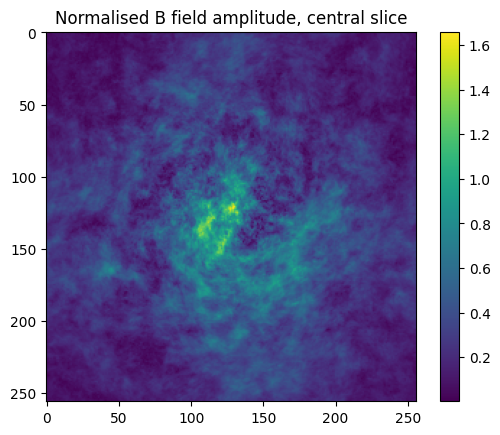

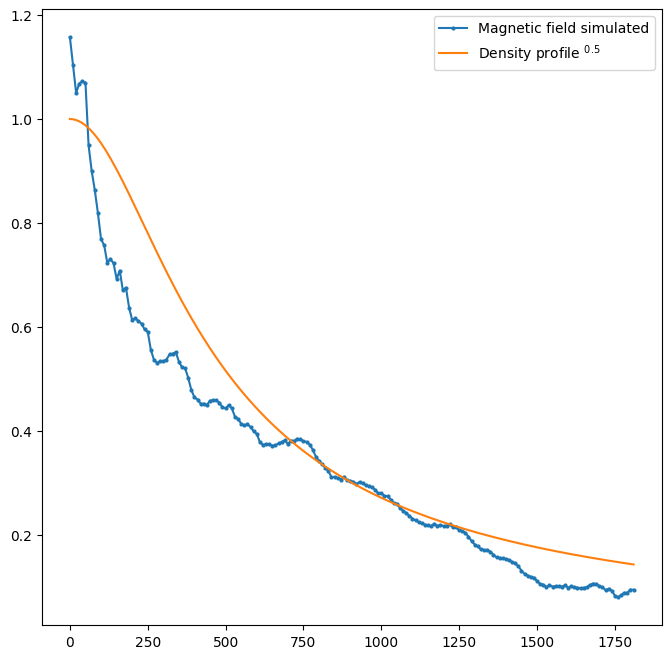

Plotting normalised B-field power spectrum


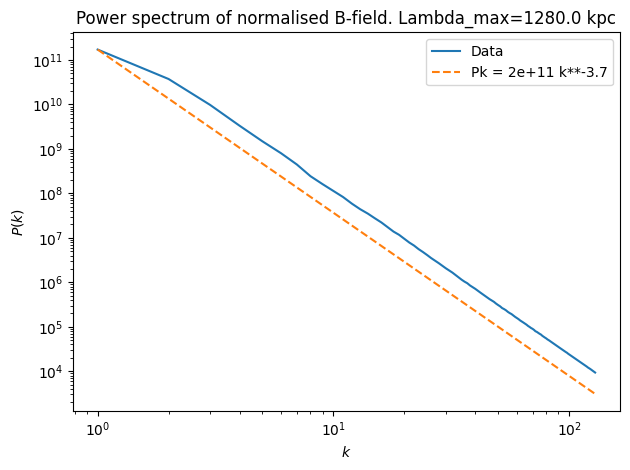

2025-03-12 12:22:34,561 INFO magneticfieldmodel run_model Calculating rotation measure images.


Plotting electron density image slice, shape (256, 256, 256)


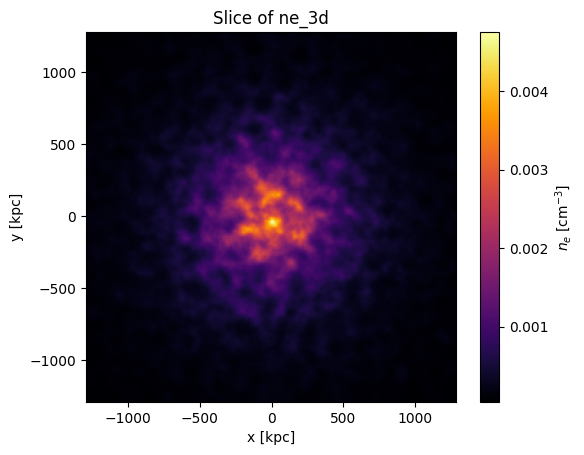

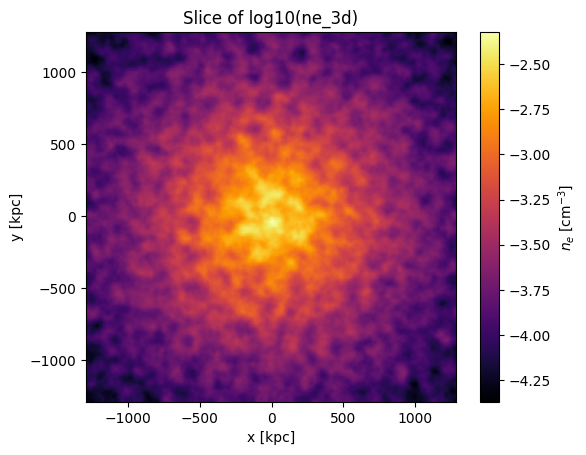

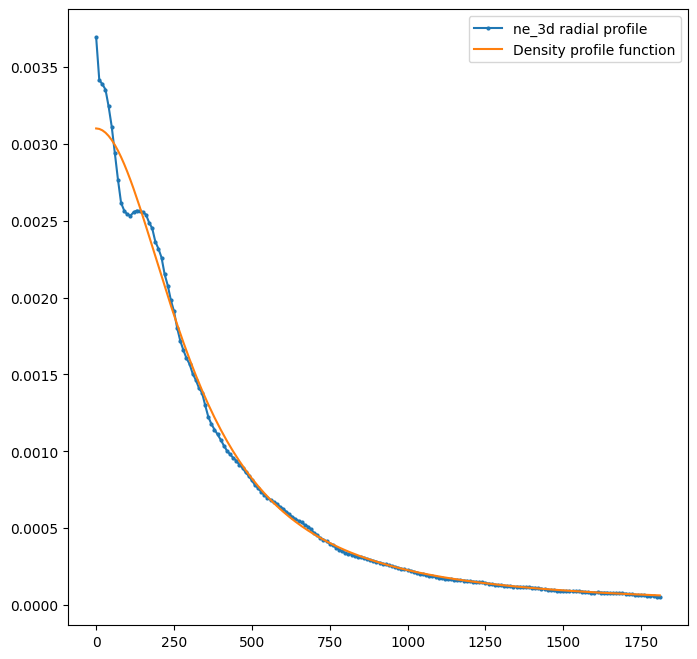

Plotting RM images. Unconvolved & convolved


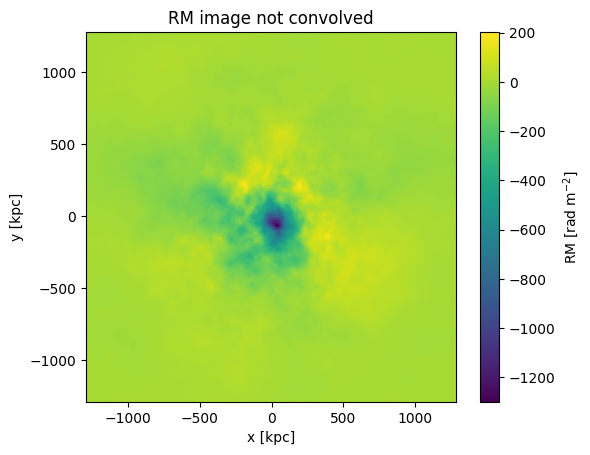

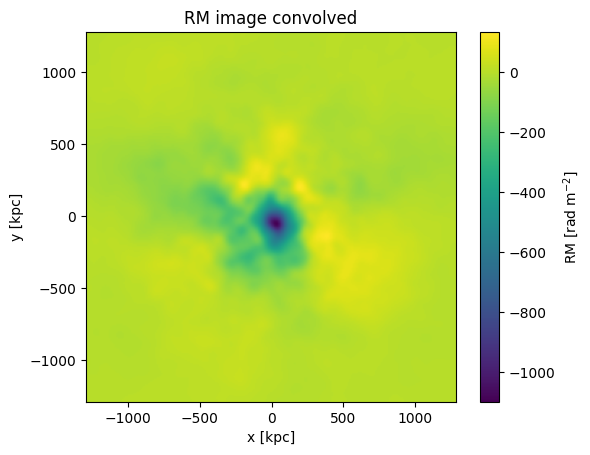

Plotting RM power spectrum


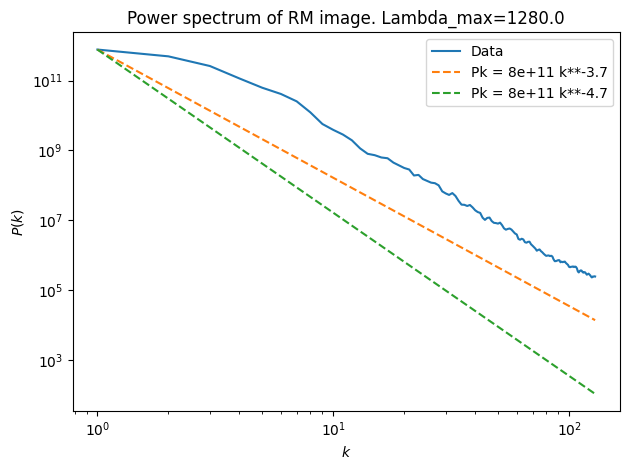

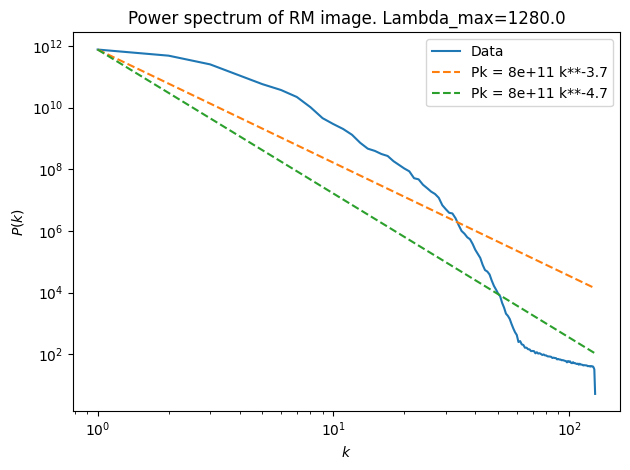

2025-03-12 12:22:35,625 INFO magneticfieldmodel run_model Calculating Stokes Q and U images
2025-03-12 12:22:35,629 INFO magneticfieldmodel run_model Convolving Stokes Q and U images
2025-03-12 12:22:35,682 INFO magneticfieldmodel run_model Script calculations finished. Took 16.7 seconds which is 0.0 hours or 0.0 days


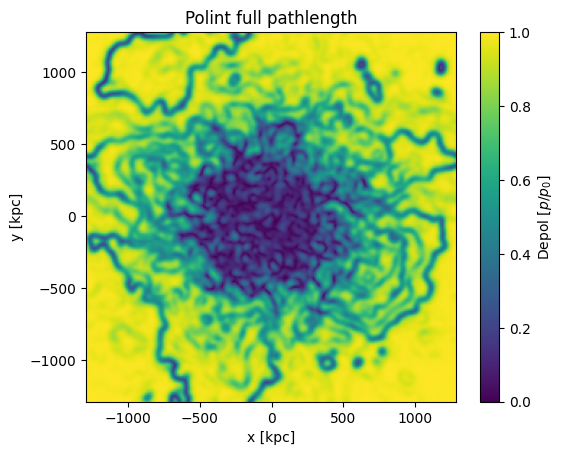

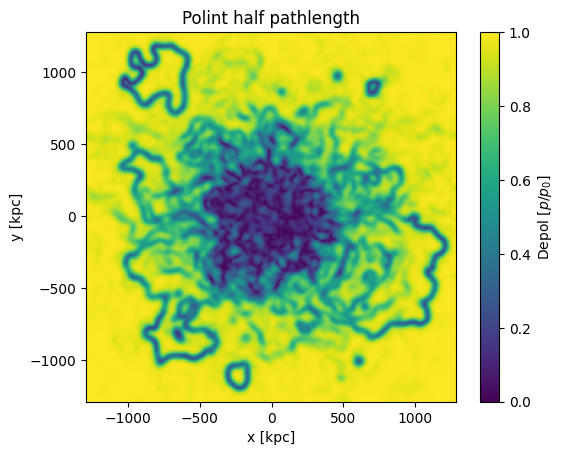

2025-03-12 12:22:35,942 INFO magneticfieldmodel save_results Saving results to ../tests_local/after_normalise/example_A2256/
2025-03-12 12:22:35,946 INFO magneticfieldmodel run_model Script fully finished. Took 17 seconds which is 0.0 hours or 0.0 days


In [5]:
# Start the actual calculation
model.run_model()

1. The magnetic field is a Gaussian random field showing fluctuations on a range of scales with decreasing amplitude.
2. The magnetic field amplitude follows the electron density to the power 0.5, because we have set eta=0.5
3. The magnetic field power-spectrum follows the correct power-law which we've set to Kolmogorov (xi=5.67, so B follows n = xi-2 = 3.67)
4. 5. The electron density is a Lognormal random field showing fluctuations on a range of scales up to 100 kpc with decreasing amplitude.
6. The fluctuating electron density cube scatters around the user input radial profile, calculated from the beta-function.
7. 8. The resulting RM images from integration of B and ne along the LOS
9. The resulting RM image power spectrum, we see that it follows the same power spectrum as the B-field.
10. The convolved RM image power spectrum, we see that the power drops off at small scales (large k) due to convolution
11. 12. Resulting depolarisation images from integrating along the full pathlength or half the pathlength along the line of sight.


We can access the results as class variables

In [6]:
model.RMimage.shape

(256, 256)

In [7]:
model.RMconvolved.shape

(256, 256)